# Example using pydbfilter

In this first example points are processed one at a time using the filterPoint() method.


First point is [(0, 0)]
Second point is []
Third point is [(5.370370370370371, 0.18611111111111114)]
Fourth point is [(10.346500346500346, 1.6020790020790021)]
Fifth point is []
Last point is [(20, 1.66)]


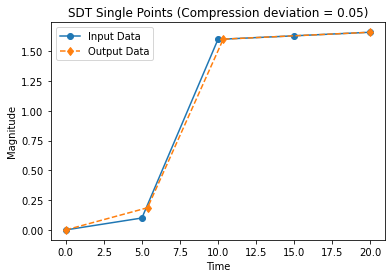

In [16]:
import matplotlib.pyplot as plt
from pydbfilter import SdtFilter

# Initialize some data
input_time = [0, 5, 10, 15, 20]
input_data = [0, 0.1, 1.6, 1.63, 1.66] 

# Create a filter object
filter = SdtFilter(0.05, 100)

# Pass in the first point
output_point = filter.filterPoint(input_time[0], input_data[0])
print("First point is {0}".format(output_point))
output_points = output_point

# Pass in the second point
output_point = filter.filterPoint(input_time[1], input_data[1])
print("Second point is {0}".format(output_point))
output_points += output_point

# Pass in the third point
output_point = filter.filterPoint(input_time[2], input_data[2])
print("Third point is {0}".format(output_point))
output_points += output_point

# Pass in the fourth point
output_point = filter.filterPoint(input_time[3], input_data[3])
print("Fourth point is {0}".format(output_point))
output_points += output_point

# Pass in the fifth point
output_point = filter.filterPoint(input_time[4], input_data[4])
print("Fifth point is {0}".format(output_point))
output_points += output_point

# Flush the last point
output_point = filter.flush()
print("Last point is {0}".format(output_point))
output_points += output_point

# Plot the output
output_time = [t for (t, d) in output_points]
output_data = [d for (t, d) in output_points]
plt.plot(input_time, input_data, "o-", label="Input Data")
plt.plot(output_time, output_data, "d--", label="Output Data")
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("SDT Single Points (Compression deviation = 0.05)")
plt.legend()
plt.show()


## Batch Processing Using a List

In this example the filterPoints() method is used to process a list of points().

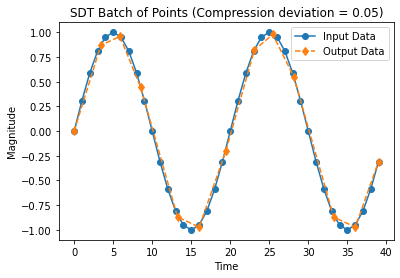

In [22]:
import matplotlib.pyplot as plt
from math import sin, pi
from pydbfilter import SdtFilter, DeadbandFilter, FilterTree

# Generate a sine wave
input_time = [i for i in range(0,40)]
input_data = [sin(t*2*pi/20) for t in input_time] 
input_points = list(zip(input_time, input_data))

# Create a filter object
filter = SdtFilter(0.05, 100)

# Filter the points
output_points = filter.filterPoints(input_points)

# Flush the last point from the filter
output_points += filter.flush()

# Plot the output
output_time = [t for (t, d) in output_points]
output_data = [d for (t, d) in output_points]
plt.plot(input_time, input_data, "o-", label="Input Data")
plt.plot(output_time, output_data, "d--", label="Output Data")
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("SDT Batch of Points (Compression deviation = 0.05)")
plt.legend()
plt.show()


## Using a Pandas DataFrame Object

This example also uses the filterPoints() method, this time using a DataFrame object as input.

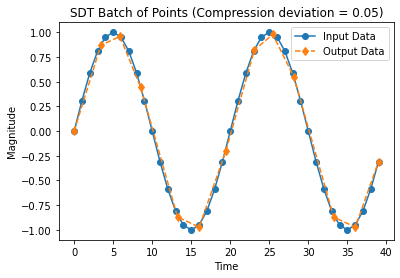

In [30]:
import matplotlib.pyplot as plt
from math import sin, pi
from pandas import DataFrame
from pydbfilter import SdtFilter, DeadbandFilter, FilterTree

# Generate a sine wave
input_time = [i for i in range(0,40)]
input_data = [sin(t*2*pi/20) for t in input_time] 
input_points = DataFrame({
                't': input_time,
                'v' : input_data
                })

# Create a filter object
filter = SdtFilter(0.05, 100)

# Filter the points
output_points = filter.filterPoints(input_points)

# Flush the last point from the filter
flushed_points = filter.flush()
output_points = output_points.append({
    't' : flushed_points[0][0],
    'v' : flushed_points[0][1]
    }, ignore_index=True)

# Plot the output
output_time = output_points['t']
output_data = output_points['v']
plt.plot(input_time, input_data, "o-", label="Input Data")
plt.plot(output_time, output_data, "d--", label="Output Data")
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("SDT Batch of Points (Compression deviation = 0.05)")
plt.legend()
plt.show()
